In [8]:
from src.post_processing import PathWrangler
from IPython.display import display, SVG
import numpy as np
import matplotlib.pyplot as plt

Initialize PathWrangler object

In [9]:
path_filepath = '../artifacts/processed_expansions/found_paths.json'
predicted_reactions_filepath = "../artifacts/processed_expansions/predicted_reactions.json"
known_reactions_filepath = "../artifacts/processed_expansions/known_reactions.json"

pw = PathWrangler(
    path_filepath=path_filepath,
    pr_filepath=predicted_reactions_filepath,
    kr_filepath=known_reactions_filepath
)

Display set of available starter target pairs

In [10]:
pw.starter_targets

(('citrate', 'hopa'),
 ('malate', 'hopa'),
 ('succinate', 'hopa'),
 ('pyruvate', 'hopa'),
 ('oxaloacetate', 'hopa'),
 ('alpha_ketoglutarate', 'hopa'))

Get all paths available

In [11]:
all_paths = pw.get_paths()
print(f"There are {len(all_paths)} total paths")

There are 88 total paths


Filter and sort paths

In [12]:
starters = ['alpha_ketoglutarate', 'succinate'] # Starters of interest
targets = ['hopa'] # Targets of interest
filter_by_enzymes = {'existence': ['protein']} # Only paths w/ enzymes w/ protein-level evidence
sort_by = 'mean_rcmcs' # Sort paths by their average reaction-center MCS

filtered_sorted_paths = pw.get_paths(
    starters=starters,
    targets=targets,
    filter_by_enzymes=filter_by_enzymes,
    sort_by=sort_by
)
print(f"There are {len(filtered_sorted_paths)} paths after filtering")

There are 7 paths after filtering


Look at path-level info

In [13]:
best_path = filtered_sorted_paths[0]
print(f"Best path has {len(best_path.reactions)} reactions")
print(f"Min RCMCS: {best_path.min_rcmcs}, Mean RCMCS: {best_path.mean_rcmcs}")


Best path has 2 reactions
Min RCMCS: 0.9827586206896551, Mean RCMCS: 0.9848858038513211


Look at info on the predicted reactions

Reaction #1. Best RCMCS: [0.9827586206896551]


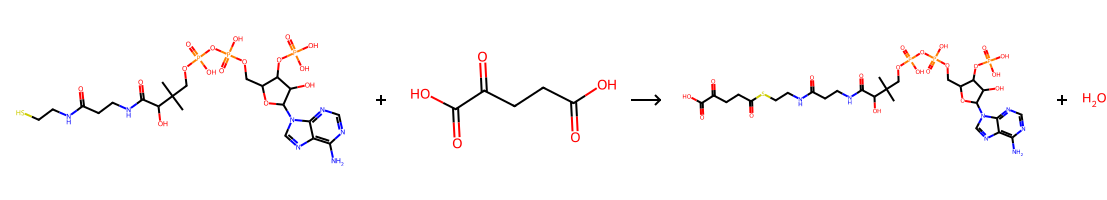

Reaction #2. Best RCMCS: [0.987012987012987]


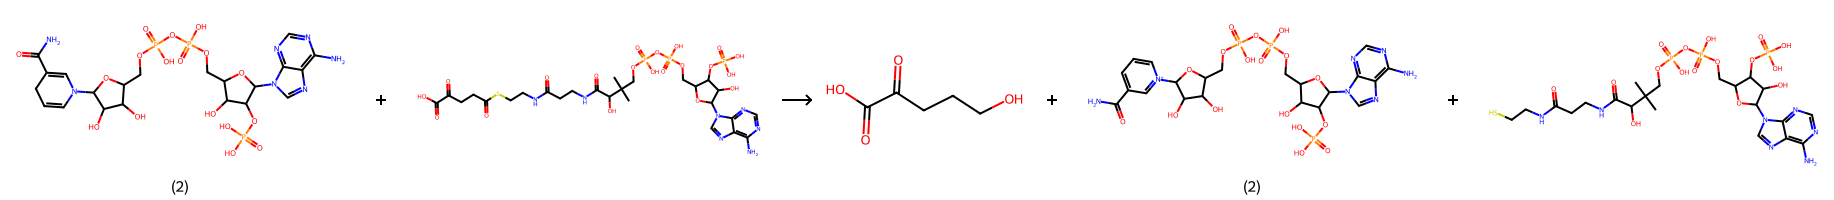

In [14]:
rxn1, rxn2 = best_path.reactions
print(f"Reaction #1. Best RCMCS: {rxn1.top_rcmcs(k=1)}")
display(SVG(rxn1.image))

print(f"Reaction #2. Best RCMCS: {rxn2.top_rcmcs(k=1)}")
display(SVG(rxn2.image))

Examine known reaction analogues

The first reaction has 62 known analogues


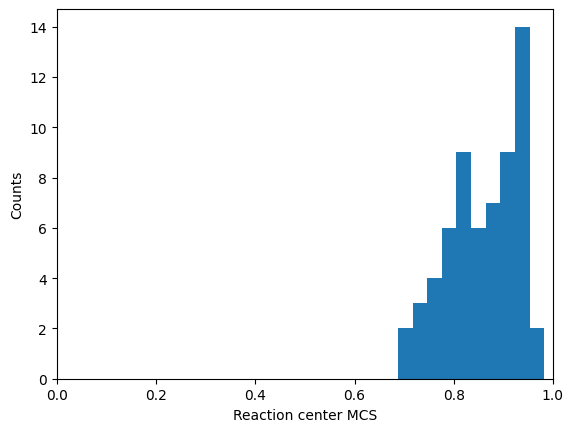

Predicted reaction #1


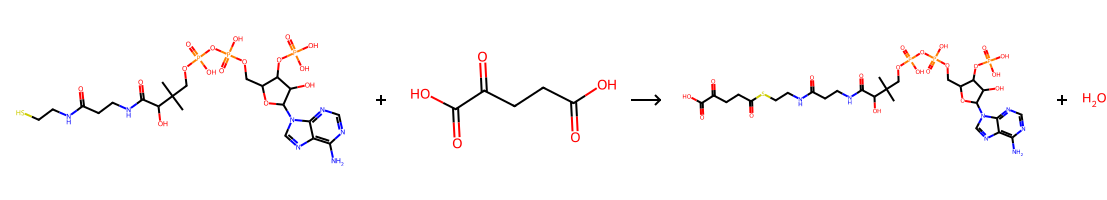

Closest known analogue


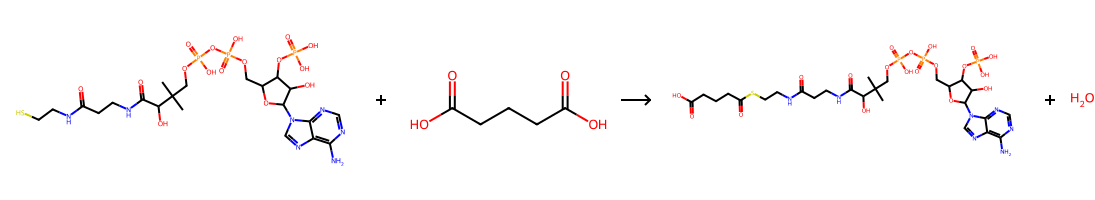

In [15]:
print(f"The first reaction has {len(rxn1.analogues)} known analogues")
rcmcses = rxn1.top_rcmcs(k=100)

# Histogram of rcmcses
plt.hist(rcmcses)
plt.xlim(0, 1)
plt.ylabel('Counts')
plt.xlabel('Reaction center MCS')
plt.show()

closest_known = rxn1.top_analogues(k=1)[0]
print("Predicted reaction #1")
display(SVG(rxn1.image))

print("Closest known analogue")
display(SVG(closest_known.image))

Pull info on enzymes

In [11]:
print(f"Analogue has {len(closest_known.enzymes)} enzymes validated up to the {list(filter_by_enzymes.values())} level")

organisms = set()
for e in closest_known.enzymes:
    organisms.add(e.organism)

print(f"Enzymes are found across organisms: {organisms}")
print(f"Enzyme UniProt IDs are available: {[e.uniprot_id for e in closest_known.enzymes]}")

Analogue has 5 enzymes validated up to the [['Evidence at protein level']] level
Enzymes are found across organisms: {'Rattus norvegicus (Rat)', 'Homo sapiens (Human)', 'Mus musculus (Mouse)'}
Enzyme UniProt IDs are available: ['Q8N9L9', 'O14734', 'Q8BWN8', 'P58137', 'Q8VHK0']


Finally, can access known reactions on database where they came from

In [20]:
closest_known.db_entries

[DatabaseEntry(name='rhea', id=40577)]